## 实现 Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
x = np.array(x, dtype=float)
y = np.array(y, dtype=float)

[0, 6, 0, 6]

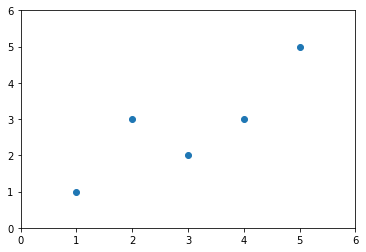

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])

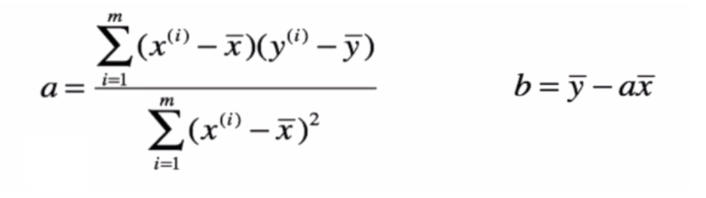

### 1. 计算 x，y相应的均值

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

### 2. 求 a

上下都是求和，使用循环

In [7]:
num = 0.0 # 分子
d = 0.0 # 分母

for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [8]:
a = num / d
b = y_mean - a * x_mean

In [9]:
print(a)
print(b)

0.8
0.39999999999999947


In [10]:
y_hat = a * x + b

[0, 6, 0, 6]

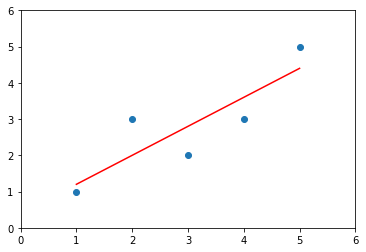

In [11]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="r")
plt.axis([0, 6, 0, 6])

In [12]:
x_predict = 6
y_predict = a * x_predict + b

In [13]:
y_predict

5.2

## 使用我们自己的SimpleLinearRegression

In [19]:
%run D:\\python-code\SimpleLinearRegression.py

In [20]:
reg1 = SimpleLinearRegression1()
reg1.fit(x, y)

SimpleLinearRegression1()

In [21]:
reg1.predict(np.array([x_predict])) # predict中需要传入一个向量

array([5.2])

In [22]:
reg1.a_

0.8

In [23]:
reg1.b_

0.39999999999999947

In [24]:
y_hat = reg1.predict(x)

[0, 6, 0, 6]

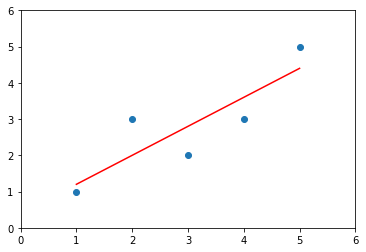

In [25]:
plt.scatter(x, y)
plt.plot(x, y_hat, color = "r")
plt.axis([0, 6, 0, 6])

## 向量化实现SimpleLinearRegression

In [26]:
%run D:\\python-code\SimpleLinearRegression.py

In [27]:
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)

SimpleLinearRegression2()

In [28]:
reg2.a_

0.8

In [29]:
reg2.b_

0.39999999999999947

[0, 6, 0, 6]

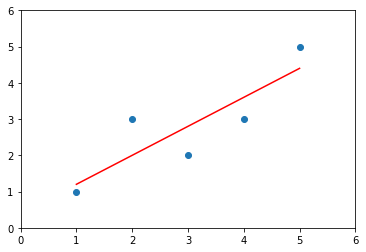

In [30]:
y_hat2 = reg2.predict(x)

plt.scatter(x, y)
plt.plot(x, y_hat2, color = "r")
plt.axis([0, 6, 0, 6])

### 向量化性能测试

#### 1. 模拟数据

生成一个数据规模为 1000000 的随机数据

In [31]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

#### 2. 性能测试与比较

In [32]:
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

764 ms ± 8.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.36 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


从上面运行结果可以看出，reg1每个循环大概花费了764ms，reg2每个循环花费了9ms，它们之间的大概相差了高达80倍。

所以我们从这里看出，向量化运算是非常有必要的。

In [33]:
print(reg1.a_) 
print(reg1.b_)
print(reg2.a_)
print(reg2.b_)

1.9999562801511415
2.9998330004660962
1.9999562801511361
2.999833000466099


a的值大概是2，b的值大概是3，和我们模拟数据时设定的2.0和3.0相接近。